The goal of this notebook is to examine to what extent the Gaussians obtained from the NHANES data are similar/different.

In [1]:
import os
import copy
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import multivariate_normal

microsimDir = "/Users/deligkaris.1/OneDrive - The Ohio State University Wexner Medical Center/MICROSIM"
dataDir = microsimDir+"/NOTEBOOKS/DATA"

#contains person-year information from a Microsim NHANES simulation
df = pd.read_csv(dataDir+"/nhanes-normality-test-4.csv")

In [2]:
meansDf = pd.read_csv(dataDir+"/nhanesMeans-4.csv", header=0)
covsDf = pd.read_csv(dataDir+"/nhanesCovs-4.csv", header=0)
minDf = pd.read_csv(dataDir+"/nhanesMin-4.csv", header=0)
maxDf = pd.read_csv(dataDir+"/nhanesMax-4.csv", header=0)

In [3]:
categoricalVars = ["gender", "smokingStatus", "raceEthnicity", "statin",'education',
                  'alcoholPerWeek','anyPhysicalActivity','antiHypertensiveCount']
continuousVars = ['age', 'hdl', 'bmi', 'totChol', 'trig', 'a1c', 'ldl', 'waist', 'creatinine', 'sbp', 'dbp']

In [4]:
meansDf.head()

,gender,smokingStatus,raceEthnicity,statin,education,alcoholPerWeek,anyPhysicalActivity,antiHypertensiveCount,weight,age,hdl,bmi,totChol,trig,a1c,ldl,waist,creatinine,sbp,dbp
0,1,0,1,False,1,0,0,0.0,0.001652,51.111111,42.111111,27.175556,220.888889,139.111111,5.833333,146.777778,97.822222,0.777778,130.666667,71.333333
1,1,0,1,False,1,0,0,1.0,0.000551,68.666667,53.000000,28.263333,191.000000,99.333333,5.200000,111.000000,101.400000,0.766667,159.777778,76.000000
2,1,0,1,False,1,0,0,2.0,0.000184,71.000000,42.000000,23.780000,150.000000,130.000000,6.900000,59.000000,92.300000,8.500000,177.333333,101.333333
3,1,0,1,False,1,0,0,3.0,0.000367,69.000000,56.500000,34.345000,246.000000,201.000000,5.500000,161.500000,113.450000,0.750000,146.333333,86.000000
4,1,0,1,False,1,0,1,0.0,0.001101,55.333333,38.166667,27.845000,213.333333,202.666667,5.650000,133.333333,99.650000,0.760000,129.333333,76.000000


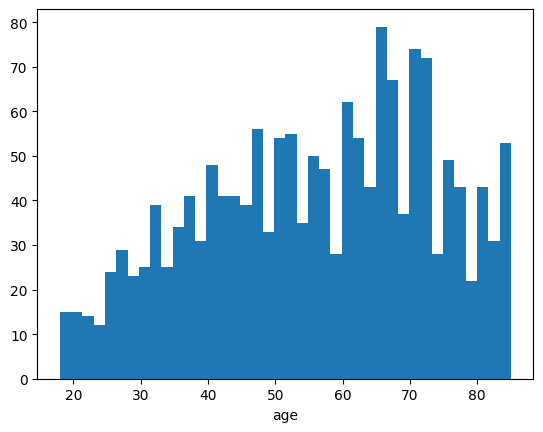

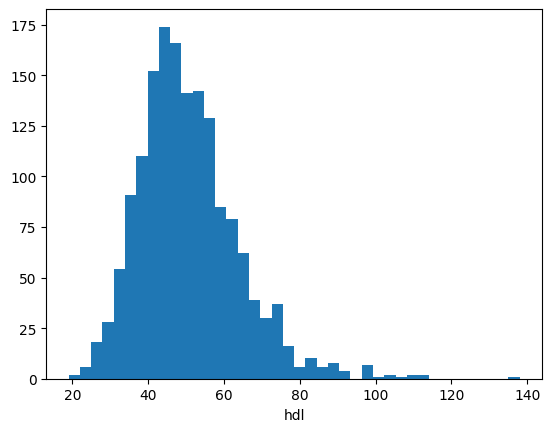

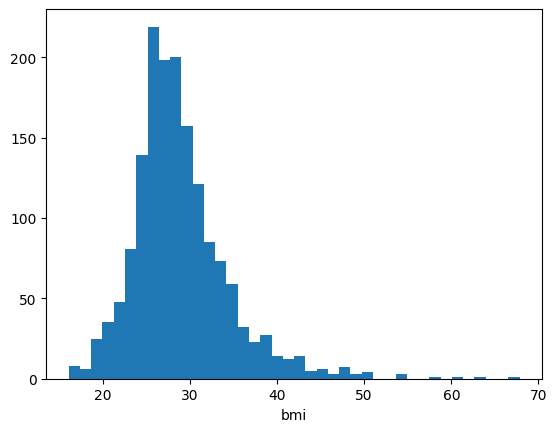

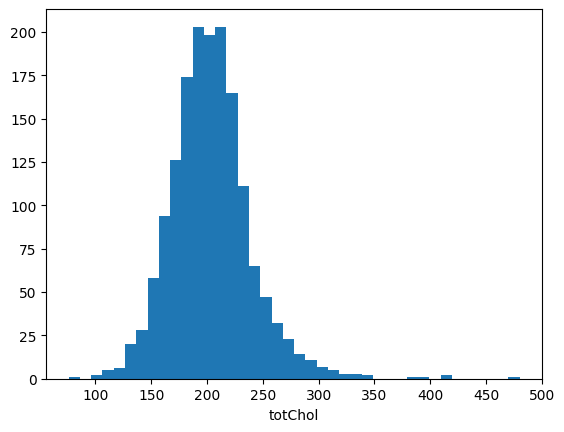

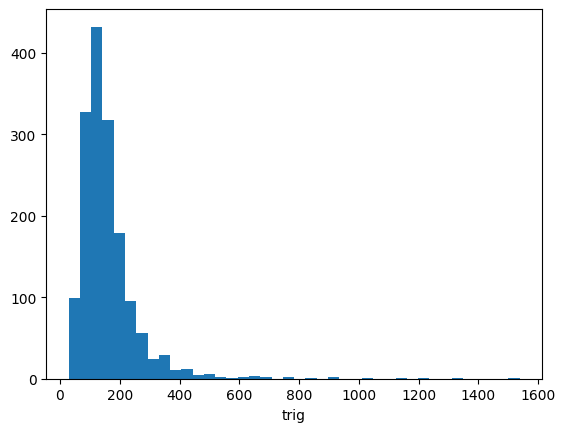

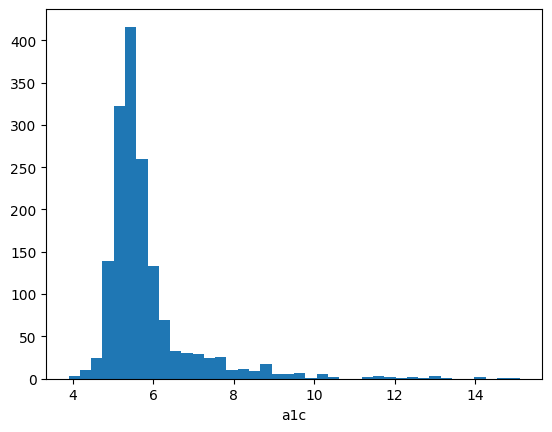

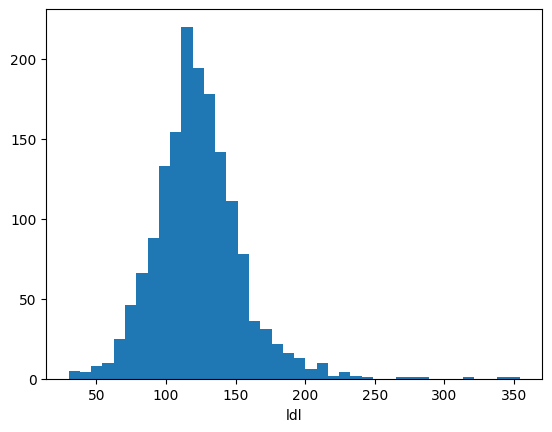

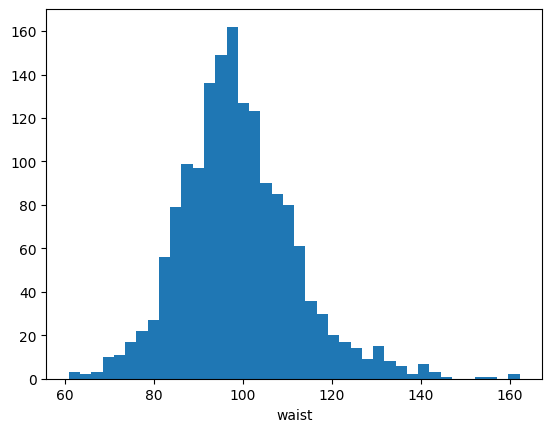

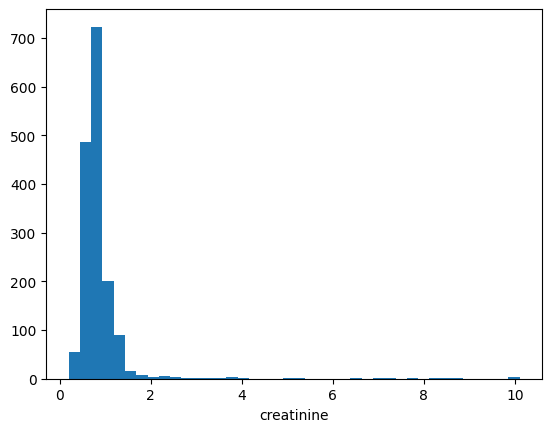

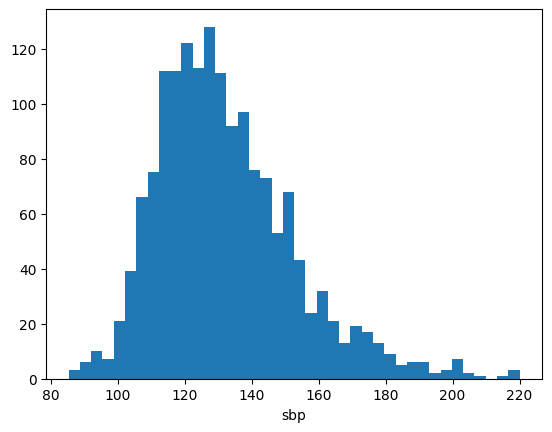

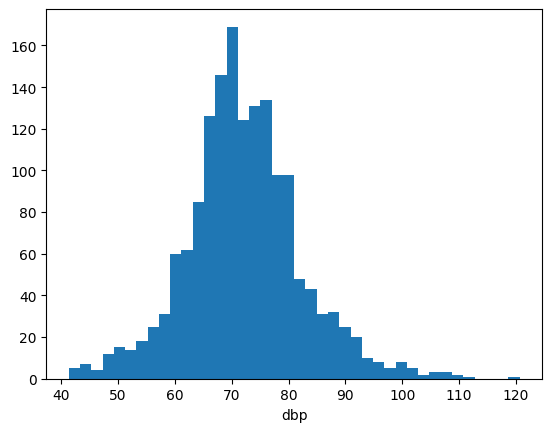

In [7]:
for var in continuousVars:
    plt.hist(meansDf[var], bins=40)
    plt.xlabel(var)
    plt.show()